<a href="https://colab.research.google.com/github/zzheng2020/ID2222-Data-Mining/blob/main/Homework4_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
data_file = 'example1.dat'

In [4]:
import numpy as np
import numpy as np
from sklearn.cluster import KMeans

def spectral_cluster(X, n_clusters=3, sigma=1): 
    '''
    n_cluster : cluster into n_cluster subset
    sigma: a parameter of the affinity matrix
    
    '''
    def affinity_matrix(X, sigma=1):
        N = len(X)
        A = np.zeros((N, N))
        for i in range(N):
            for j in range(i+1, N):
                A[i][j] = np.exp(-np.linalg.norm(X[i] - X[j])**2 / (2 * sigma ** 2))
                A[j][i] = A[i][j]
        return A
    
    A = affinity_matrix(X, sigma)
    
    def laplacianMatrix(A):
        dm = np.sum(A, axis=1)
        D = np.diag(dm)
        sqrtD = np.diag(1.0 / (dm ** 0.5))
        return np.dot(np.dot(sqrtD, A), sqrtD)
    
    L = laplacianMatrix(A)
    
    def largest_n_eigvec(L, n_clusters):
        eigval, eigvec = np.linalg.eig(L)
        index = np.argsort(np.sum(abs(eigvec), 0))[-n_clusters:]  
        # n_clusters largest eigenvectors' indexes.
        return eigvec[:, index] 
        
    newX = largest_n_eigvec(L, n_clusters)
    
    def renormalization(newX):
        Y = newX.copy()
        for i in range(len(newX)):
            norm = 0
            for j in newX[i]:
                norm += (newX[i] ** 2)
            norm = norm ** 0.5
            Y[i] /= norm
        return Y
    
    Y = renormalization(newX)
    
    kmeans = KMeans(n_clusters=n_clusters).fit(Y)
    return kmeans.labels_

In [5]:
graph = []

In [6]:
with open(data_file) as f:
    for line in f:
        nodes = line.rstrip('\n')
        u, v = nodes.split(',')
        graph.append([u, v])

In [7]:
X = np.array(graph, dtype=int)
X

array([[  1,   2],
       [  1,   3],
       [  1,   4],
       ...,
       [216, 235],
       [213, 235],
       [241, 235]])

In [12]:
y = spectral_cluster(X, n_clusters=6, sigma=1)

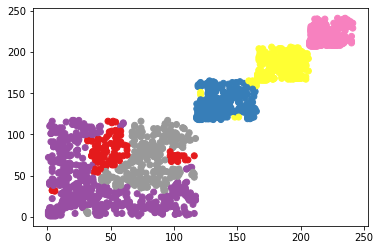

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)